In [1]:
import wetter_api as wt
import waldbrand
import model_eval as me
from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.linear_model import LinearRegression, Ridge, Lasso
# from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_squared_error, r2_score
import logging
import pandas as pd
import common_paths
import seaborn as sb
import plotly.express as pl

In [2]:
parameter_list = [
    wt.DwdObservationParameter.MONTHLY.PRECIPITATION_HEIGHT,
    wt.DwdObservationParameter.MONTHLY.CLIMATE_SUMMARY.WIND_FORCE_BEAUFORT,
    wt.DwdObservationParameter.MONTHLY.TEMPERATURE_AIR_MAX_200,
]
# Dictionary with short names as keys and full names as values
shortname_to_state = {
    "BW": "Baden-Württemberg",
    "BY": "Bayern",
    "BE": "Berlin",
    "BB": "Brandenburg",
    "HB": "Bremen",
    "HH": "Hamburg",
    "HE": "Hessen",
    "MV": "Mecklenburg-Vorpommern",
    "NI": "Niedersachsen",
    "NW": "Nordrhein-Westfalen",
    "RP": "Rheinland-Pfalz",
    "SL": "Saarland",
    "SN": "Sachsen",
    "ST": "Sachsen-Anhalt",
    "SH": "Schleswig-Holstein",
    "TH": "Thüringen",
}

# Example usage
shortname = "BB"
state = shortname_to_state.get(shortname)

In [ ]:
nr = me.prepare_data(parameter_list, state, "nr")

In [ ]:
area = prepare_data_test(parameter_list, state, "area")

In [68]:
merged_data_test.dropna()

,Year,Month,station_id,CLIMATE_SUMMARY.PRECIPITATION_HEIGHT,CLIMATE_SUMMARY.WIND_FORCE_BEAUFORT,CLIMATE_SUMMARY.TEMPERATURE_AIR_MAX_200,area
21,1996,1,00164,0.2,2.54,275.15,0.0
22,1996,1,00427,0.7,2.71,277.45,0.0
23,1996,1,00650,1.0,1.95,277.65,0.0
24,1996,1,00880,2.8,2.21,280.65,0.0
25,1996,1,01001,1.4,2.73,281.15,0.0
...,...,...,...,...,...,...,...
8370,2022,12,03158,37.2,2.29,290.65,0.0
8371,2022,12,03376,40.7,2.29,290.65,0.0
8373,2022,12,03987,58.8,3.03,290.45,0.0
8377,2022,12,05825,45.4,2.29,289.95,0.0


In [74]:
merged_data_test.describe()

,Year,Month,CLIMATE_SUMMARY.PRECIPITATION_HEIGHT,CLIMATE_SUMMARY.WIND_FORCE_BEAUFORT,CLIMATE_SUMMARY.TEMPERATURE_AIR_MAX_200
count,8381.000000,8381.000000,7905.000000,6989.000000,7997.000000
mean,2008.788927,6.503997,46.026641,2.446141,295.233306
std,7.965346,3.452562,29.771510,0.474616,8.697448
min,1995.000000,1.000000,0.000000,0.360000,274.250000
25%,2002.000000,4.000000,26.200000,2.160000,287.250000
50%,2009.000000,7.000000,39.800000,2.430000,295.550000
75%,2016.000000,10.000000,59.500000,2.740000,303.050000
max,2022.000000,12.000000,266.200000,4.420000,312.350000


In [20]:
mdf = merged_data.where(merged_data.Year>=1995).where(merged_data.Year<=2022)#.dropna()

In [21]:
mdf.rename(columns={'CLIMATE_SUMMARY.PRECIPITATION_HEIGHT':'pr', 'CLIMATE_SUMMARY.WIND_FORCE_BEAUFORT':'sfcWind', 'CLIMATE_SUMMARY.TEMPERATURE_AIR_MAX_200':'tasmax'}, inplace=True)

In [22]:
mdf.groupby(['station_id']).count()

,Year,Month,pr,sfcWind,tasmax,nFires
station_id,,,,,,
00096,44,44,44,37,44,44
00164,336,336,336,333,336,336
00303,299,299,296,246,272,299
00427,336,336,335,335,336,336
00650,76,76,76,76,76,76
00879,13,13,0,10,0,13
00880,336,336,336,327,336,336
01001,336,336,335,320,336,336
01106,0,0,0,0,0,0


In [23]:
mdf['sfcWind'] =  0.836 * (mdf['sfcWind'] ** 1.5)

In [100]:
mdf.drop(columns=["station_id"], inplace=True)

In [100]:
mdf.dropna(inplace=True)

In [100]:
mdf

In [100]:
nfplot = pl.line(x=mdf["Year"], y = mdf["nFires"]) 
fig1 = pl.scatter(x = mdf["pr"], y = mdf['nFires'], trendline="ols", title='Fires to Precipitation')
fig2 = pl.scatter(x = mdf["sfcWind"], y = mdf['nFires'], trendline="ols", title='Fires to Wind')
fig3 = pl.scatter(x = mdf["tasmax"], y = mdf['nFires'], trendline="ols", title='Fires to Temperature')
fig4 = pl.scatter(x = mdf["Year"], y = mdf['nFires'], trendline="ols", title='Fires per Year')
fig5 = pl.scatter(x = mdf["Month"], y = mdf['nFires'], trendline="ols", title='Fires per Month')

nfplot.show()
fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

In [8]:
#.describe()

,Year,Month,station_id,CLIMATE_SUMMARY.PRECIPITATION_HEIGHT,CLIMATE_SUMMARY.WIND_FORCE_BEAUFORT,CLIMATE_SUMMARY.TEMPERATURE_AIR_MAX_200,nFires
0,1995,1,00164,42.5,3.46,285.35,0.0
1,1995,1,00427,43.5,3.34,285.75,0.0
2,1995,1,00650,71.3,2.42,285.65,0.0
3,1995,1,00880,47.1,2.74,286.15,0.0
4,1995,1,01001,52.0,3.39,285.75,0.0
...,...,...,...,...,...,...,...
8376,2022,12,05745,53.9,NaN,288.75,0.0
8377,2022,12,05825,45.4,2.29,289.95,0.0
8378,2022,12,06170,42.3,NaN,291.25,0.0
8379,2022,12,06265,58.2,NaN,290.95,0.0


,Year,Month,CLIMATE_SUMMARY.PRECIPITATION_HEIGHT,CLIMATE_SUMMARY.WIND_FORCE_BEAUFORT,CLIMATE_SUMMARY.TEMPERATURE_AIR_MAX_200,nFires
station_id,,,,,,
00096,44,44,44,37,44,44
00164,336,336,336,333,336,336
00303,299,299,296,246,272,299
00427,336,336,335,335,336,336
00650,76,76,76,76,76,76
00879,13,13,0,10,0,13
00880,336,336,336,327,336,336
01001,336,336,335,320,336,336
01106,0,0,0,0,0,0


In [12]:
dffbb = pd.read_csv(common_paths.DATA.joinpath("dwd/future_Brandenburg.csv"))

In [13]:
dffbb.drop(columns=['Unnamed: 0', 'Bundesland'], inplace = True)

In [14]:
dffbb['pr'] = dffbb['pr'] * 3600 * 24 * 30

In [15]:
merge_all = pd.merge(mdf, dffbb, on=["Year", "Month", 'sfcWind', 'tasmax', 'pr'], how='outer')

In [16]:
merge_all.drop(columns=["station_id"], inplace=True)

In [17]:
merge_all

,Year,Month,pr,sfcWind,tasmax,nFires
0,1995,1,42.500000,5.380473,285.35000,0.0
1,1995,1,43.500000,5.103005,285.75000,0.0
2,1995,1,71.300000,3.147236,285.65000,0.0
3,1995,1,47.100000,3.791684,286.15000,0.0
4,1995,1,52.000000,5.218021,285.75000,0.0
...,...,...,...,...,...,...
78771,2054,1,41.612901,4.516129,274.10160,NaN
78772,2054,1,51.967742,5.196774,273.57257,NaN
78773,2054,1,51.967742,5.316129,273.62740,NaN
78774,2054,1,45.483872,5.216129,273.60483,NaN


In [26]:
mdf

,Year,Month,pr,sfcWind,tasmax,nFires
0,1995,1,42.5,5.380473,285.35,0.0
1,1995,1,43.5,5.103005,285.75,0.0
2,1995,1,71.3,3.147236,285.65,0.0
3,1995,1,47.1,3.791684,286.15,0.0
4,1995,1,52.0,5.218021,285.75,0.0
...,...,...,...,...,...,...
8376,2022,12,53.9,NaN,288.75,0.0
8377,2022,12,45.4,2.897073,289.95,0.0
8378,2022,12,42.3,NaN,291.25,0.0
8379,2022,12,58.2,NaN,290.95,0.0


,Year,Month,pr,sfcWind,tasmax,nFires
0,1995,1,42.5,5.380473,285.35,0.0
1,1995,1,43.5,5.103005,285.75,0.0
2,1995,1,71.3,3.147236,285.65,0.0
3,1995,1,47.1,3.791684,286.15,0.0
4,1995,1,52.0,5.218021,285.75,0.0
...,...,...,...,...,...,...
8370,2022,12,37.2,2.897073,290.65,0.0
8371,2022,12,40.7,2.897073,290.65,0.0
8373,2022,12,58.8,4.409306,290.45,0.0
8377,2022,12,45.4,2.897073,289.95,0.0


NameError: name 'mdf' is not defined

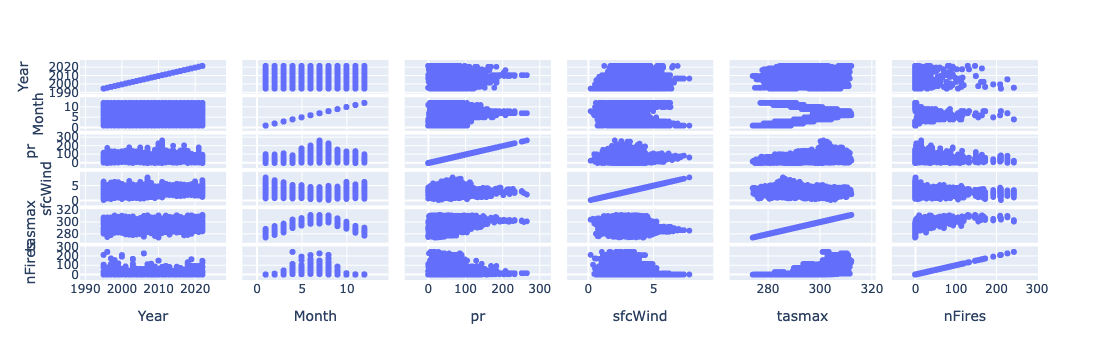

In [25]:
scat = pl.scatter_matrix(mdf)
scat.show()

In [26]:
mdf.describe()

,Year,Month,pr,sfcWind,tasmax,nFires
count,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000,6620.000000
mean,2007.628852,6.503776,46.181541,3.228846,295.053776,28.099547
std,7.679455,3.466127,30.383094,0.928339,8.696294,43.975493
min,1995.000000,1.000000,0.000000,0.180576,274.250000,0.000000
25%,2001.000000,3.000000,26.075000,2.598817,287.225000,0.000000
50%,2007.000000,7.000000,39.800000,3.166764,295.450000,6.000000
75%,2014.000000,10.000000,59.500000,3.791684,302.950000,37.000000
max,2022.000000,12.000000,266.200000,7.768545,312.350000,244.000000


<Axes: >

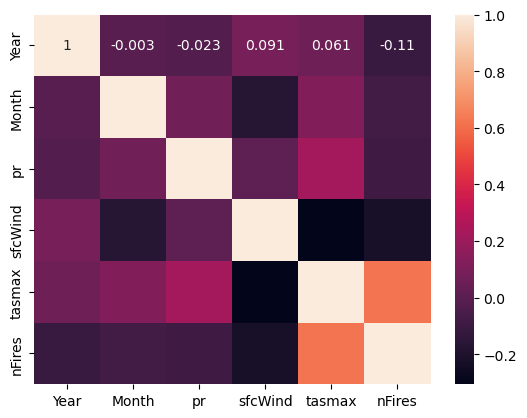

In [27]:
'''
Achtung hier lineare korrelationen -> hoch heißt korrelation ist stark aber niedrig kann andere art von korrelation sein
(BSP regen zu feuer)
'''
sb.heatmap(mdf.corr(), annot=True)

In [35]:
mdf.corr()

,Year,Month,pr,sfcWind,tasmax,nFires
Year,1.000000,-0.003038,-0.022764,0.091451,0.060791,-0.111551
Month,-0.003038,1.000000,0.074382,-0.170993,0.117366,-0.075584
pr,-0.022764,0.074382,1.000000,0.010522,0.219663,-0.087637
sfcWind,0.091451,-0.170993,0.010522,1.000000,-0.306115,-0.224123
tasmax,0.060791,0.117366,0.219663,-0.306115,1.000000,0.618533
nFires,-0.111551,-0.075584,-0.087637,-0.224123,0.618533,1.000000


In [305]:
test_size=0.2
random_state=42
str_parameter_list = [str(param) for param in parameter_list]
feature_list = ["sfcWind", "pr", "tasmax"]
X = mdf[feature_list]
y = mdf["nFires"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
)

print(y_train)
# results = evaluate_model(X_train, X_test, y_train, y_test)

6367      0.0
6519      0.0
1895      4.0
3117     99.0
4088    165.0
        ...  
4762    116.0
6554      9.0
6590      1.0
6795      5.0
1034      1.0
Name: nFires, Length: 5296, dtype: float64


In [306]:
# How to define this?
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": list(range(5, 21, 5)),  # Smaller range for max depth
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10]
}
rf = RandomForestRegressor()

grid_search = GridSearchCV(
    estimator=rf, param_grid=param_grid, cv=10, scoring="neg_mean_squared_error"
)

#searching for the right parameters using random Forest on a 10-fold Cross Validation (cv) and the nmse
grid_search.fit(X_train, y_train)

# saving best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [307]:
print(best_params)
print(best_model)
#grid_search.cv_results_
#grid_search.best_index_

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
RandomForestRegressor(max_depth=10, min_samples_split=10, n_estimators=300)


In [308]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


#predict 'Anzahl Waldbrände' with the model
y_pred = best_model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2 Score: {r2}")
print(f"MAE: {mae}")

MSE: 785.3555244353619
R2 Score: 0.5930853584898288
MAE: 16.047197615209544
